# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [3]:
# student 1: Eti 8094
# student 2: Aviv 5792

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [5]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, make_scorer, r2_score,accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix


In [6]:
train_file = 'titanic_train.csv'
trainset = pd.read_csv(train_file)
print("Trainset - the first 5 rows:")
trainset.head()

Trainset - the first 5 rows:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [7]:
test_file = 'titanic_test.csv'
testset = pd.read_csv(test_file)
print("Testset - the first 5 rows:")
testset.head()

Testset - the first 5 rows:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


Statistics of the Dataset:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.640449,29.531213,0.528090,0.384831,32.379429,0.372191,0.394663
std,0.841990,0.480206,13.188028,1.055052,0.803085,49.836074,0.649970,0.489122
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.500000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


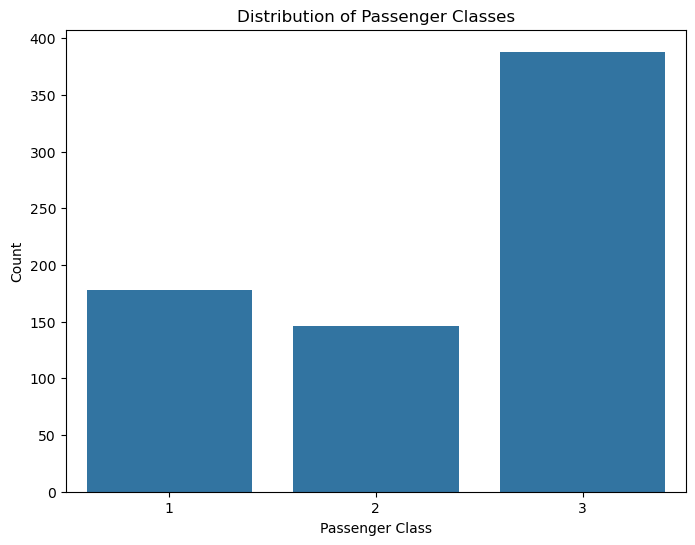

<Figure size 1000x1000 with 0 Axes>

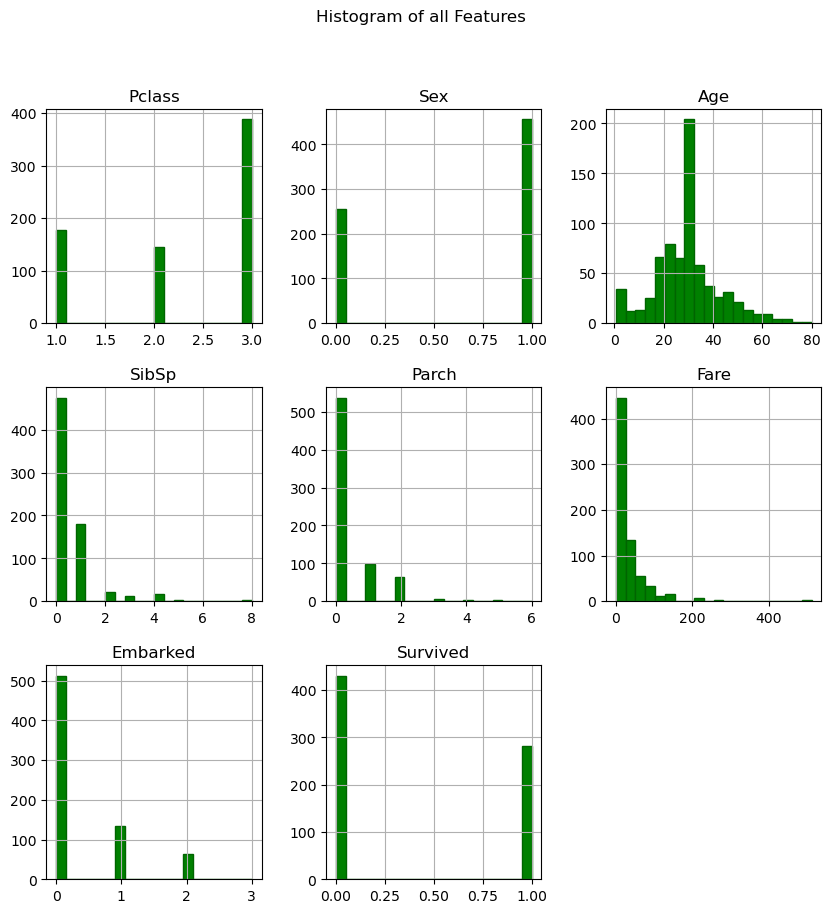

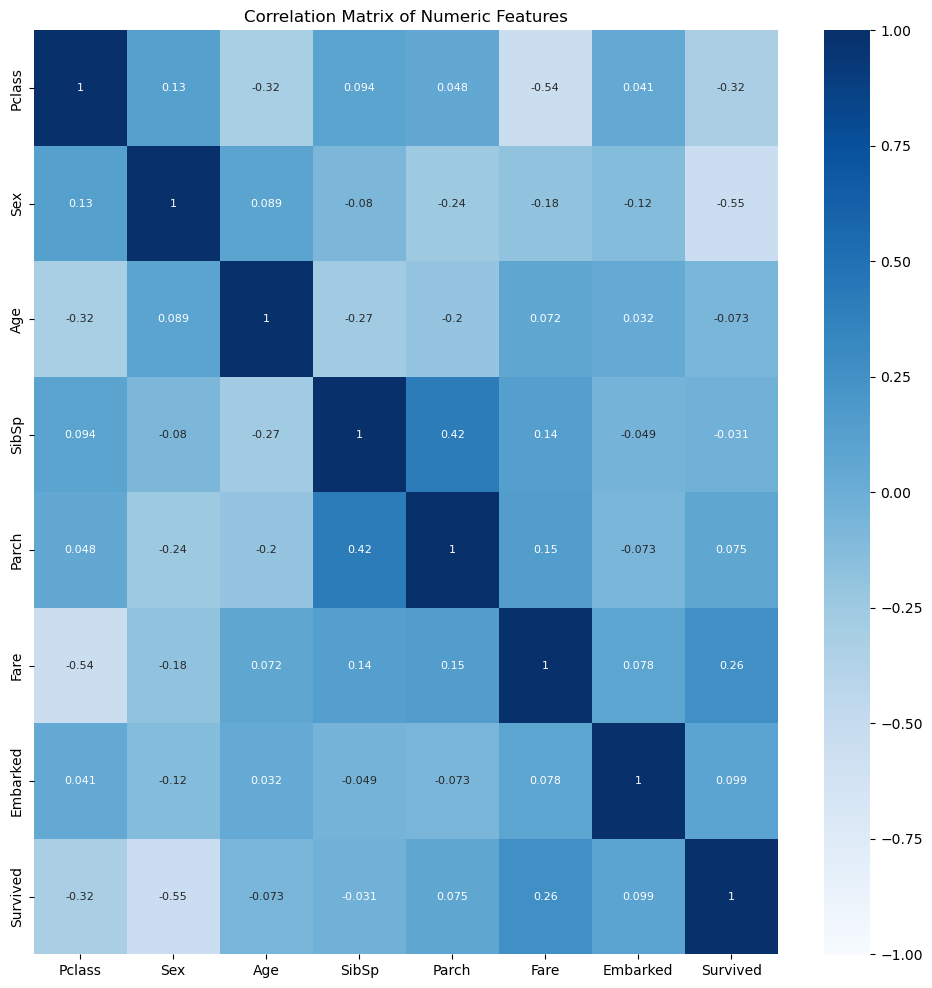

In [8]:
# 1. Display summary statistics
print("Statistics of the Dataset:")
display(trainset.describe())

# 2. Distribution of a categorical variable (e.g., 'Pclass')
plt.figure(figsize=(8, 6))
sns.countplot(data=trainset, x='Pclass')  # Removed palette since it's causing the warning
plt.title('Distribution of Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# 3. Histogram of numeric features
plt.figure(figsize=(10, 10))
trainset.hist(bins=20, figsize=(10, 10), edgecolor='darkgreen', color='green')
plt.suptitle('Histogram of all Features')
plt.show()

# 4. Correlation heatmap of numeric features
trainset_numeric = trainset.select_dtypes(include=[np.number])
corr_matrix = trainset_numeric.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, annot_kws={"fontsize": 8}, vmin=-1, vmax=1, cmap='Blues')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


## Part 3 - Experiments
You could add as many code cells as needed

In [10]:
# Define features and target
X = trainset.drop('Survived', axis=1)
y = trainset['Survived']

# Define feature engineering steps: StandardScaler and MinMaxScaler
preprocessors = {
    'Standard Scaler': StandardScaler(),
    'MinMax Scaler': MinMaxScaler()
}

# Define models and hyperparameters for grid search
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Define hyperparameter grids for models
param_grids = {
    'Logistic Regression': {'model__C': [0.1, 1, 10], 'model__solver': ['liblinear']},
    'SVM': {'model__C': [0.1, 1, 10], 'model__kernel': ['linear', 'rbf']},
    'KNN': {'model__n_neighbors': [3, 5, 7], 'model__weights': ['uniform', 'distance'], 'model__p': [1, 2]},
    'Decision Tree': {'model__max_depth': [None, 10, 20],'model__min_samples_split': [2, 5, 10]}
}

# Initialize an empty list to store the results
results = []

# Perform Grid Search with 5-Fold Cross-Validation for each model and preprocessing method
for preprocessor_name, preprocessor in preprocessors.items():
    for model_name, model in models.items():
        # Create a pipeline with preprocessing and model
        pipe = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', model)
        ])
        
        # Define the GridSearchCV
        grid_search = GridSearchCV(pipe, param_grids[model_name], cv=5, scoring=make_scorer(f1_score, average='macro'))
        
        # Fit the model (cross-validation happens within GridSearchCV)
        grid_search.fit(X, y)
        
        # Store results
        results.append({
            'Preprocessing': preprocessor_name,
            'Model': model_name,
            'Best Params': grid_search.best_params_,
            'Best Score (f1)': grid_search.best_score_
        })

# Create a summary DataFrame
summary_df = pd.DataFrame(results)

# Apply styling to highlight the best score
def highlight_best(s):
    is_best = s == s.max()
    return ['background-color: #228b22; color: white' if v else '' for v in is_best]

# Style the DataFrame
styled_summary_df = summary_df.style.apply(highlight_best, subset=['Best Score (f1)'])

# Display the styled DataFrame
styled_summary_df


,Preprocessing,Model,Best Params,Best Score (f1)
0,Standard Scaler,Logistic Regression,"{'model__C': 10, 'model__solver': 'liblinear'}",0.787134
1,Standard Scaler,SVM,"{'model__C': 1, 'model__kernel': 'rbf'}",0.807718
2,Standard Scaler,KNN,"{'model__n_neighbors': 3, 'model__p': 2, 'model__weights': 'uniform'}",0.787705
3,Standard Scaler,Decision Tree,"{'model__max_depth': 10, 'model__min_samples_split': 10}",0.773866
4,MinMax Scaler,Logistic Regression,"{'model__C': 10, 'model__solver': 'liblinear'}",0.791203
5,MinMax Scaler,SVM,"{'model__C': 10, 'model__kernel': 'rbf'}",0.790016
6,MinMax Scaler,KNN,"{'model__n_neighbors': 3, 'model__p': 2, 'model__weights': 'uniform'}",0.786155
7,MinMax Scaler,Decision Tree,"{'model__max_depth': 10, 'model__min_samples_split': 5}",0.779469


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [12]:
# Define the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('classifier', SVC(C=1, kernel='rbf'))  # SVM with specified parameters
])

# Train the pipeline on the entire dataset (cross-validation will handle splitting)
pipe.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC(C=1))])

## Part 5 - Apply on test and show model performance estimation

In [14]:

# Prepare test data
X_test = testset.drop('Survived', axis=1)
y_test = testset['Survived']
# Predict on the test set
y_pred = pipe.predict(X_test)

print("First 5 predictions on the test set:")
print(y_pred[:5])

f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print(f"Test set F1 Score: {f1}")
print(f"Test set Accuracy: {accuracy}")

class_report = classification_report(y_test, y_pred)
print("\nClassification report:")
print(class_report)

First 5 predictions on the test set:
[0 0 0 1 0]
Test set F1 Score: 0.8159024009646416
Test set Accuracy: 0.8379888268156425

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       118
           1       0.79      0.72      0.75        61

    accuracy                           0.84       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.84      0.84      0.84       179



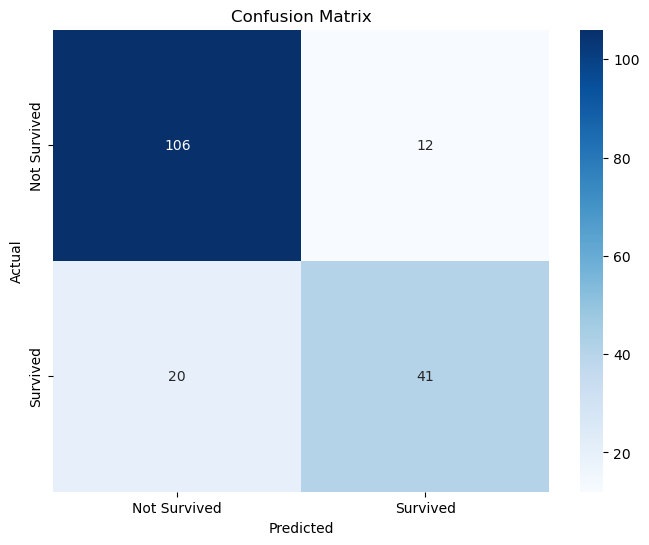

In [15]:
# Plot confusion matrix
y_pred = grid_search.best_estimator_.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()